In [18]:
#RQ3
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# timedelta is needed to express difference between 2 timestamps in minutes
from datetime import timedelta
# math library is needed for ceil function
import math
import matplotlib.pyplot as plt
import os, json, requests, pickle
from scipy.stats import skew
#from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
#import scipy.stats as st
from sklearn.preprocessing import normalize, scale
#from tabulate import tabulate #pretty print of tables. source: http://txt.arboreus.com/2013/03/13/pretty-print-tables-in-python.html
#from shapely.geometry import Point,Polygon,MultiPoint
import warnings
warnings.filterwarnings('ignore')

In [19]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [20]:
taxi_zones=pd.read_csv('taxi _zone_lookup.csv',encoding='latin1')

In [21]:
# Merge the data set with the reference data for taxi zones
yellow_2018_06_with_tz = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [22]:
# columns tpep_pickup_datetime and tpep_dropoff_datetime are in string format
# to caclulate duration of the ride we need to convert them to date format which can be done using strptime function from datetime
yellow_2018_06_with_tz['tpep_dropoff_datetime'] = yellow_2018_06_with_tz['tpep_dropoff_datetime'].map(lambda tpep_dropoff_datetime: datetime.strptime(tpep_dropoff_datetime, "%Y-%m-%d %H:%M:%S"))

In [23]:
yellow_2018_06_with_tz['tpep_pickup_datetime'] = yellow_2018_06_with_tz['tpep_pickup_datetime'].map(lambda tpep_pickup_datetime: datetime.strptime(tpep_pickup_datetime, "%Y-%m-%d %H:%M:%S"))

In [24]:
# adding new column trip_duration into the data set
yellow_2018_06_with_tz['trip_duration']=(yellow_2018_06_with_tz['tpep_dropoff_datetime']-yellow_2018_06_with_tz['tpep_pickup_datetime'])/timedelta(minutes=1)
# to plot trip duration in more readable form values will be rounded upwards (ceiled)
yellow_2018_06_with_tz['trip_duration']=yellow_2018_06_with_tz['trip_duration'].map(lambda trip_duration: math.ceil(trip_duration))


In [98]:
#yellow_2018_06_with_tz['num_trips'] = 1
#yellow_2018_06_with_tz['Borough'] = 1
#grouped=yellow_2018_06_with_tz.groupby(['trip_duration', 'Borough'], as_index=False).count()

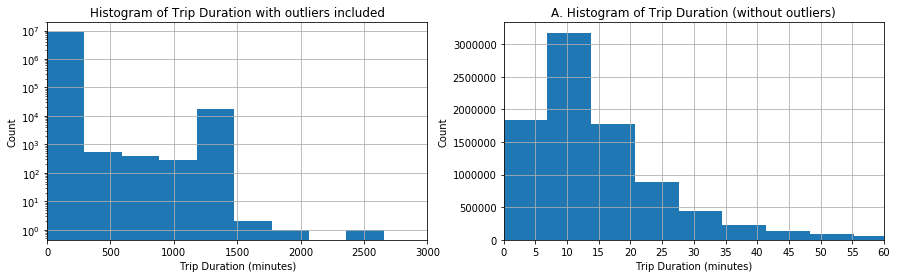

In [57]:
%matplotlib inline

# define the figure with 2 subplots
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# histogram of the number of trip distance
yellow_2018_06_with_tz.trip_duration.hist(bins=30,ax=ax[0])
ax[0].set_xlabel('Trip Duration (minutes)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Histogram of Trip Duration with outliers included')
ax[0].set_xlim([0,3000])

# create a vector to contain Trip Duration
v = yellow_2018_06_with_tz.trip_duration
# exclude any data point located further than 3 standard deviations of the median point and 
# plot the histogram with 30 bins
v[~((v-v.median()).abs()>3*v.std())].hist (bins=30,ax=ax[1]) # 
c=0
x=[]
while c<=60:
    x.append(c)
    c+=5
ax[1].set_xticks(x) 
ax[1].set_xlabel('Trip Duration (minutes)')
ax[1].set_ylabel('Count')
ax[1].set_title('A. Histogram of Trip Duration (without outliers)')
ax[1].set_xlim([0,60])

plt.show()

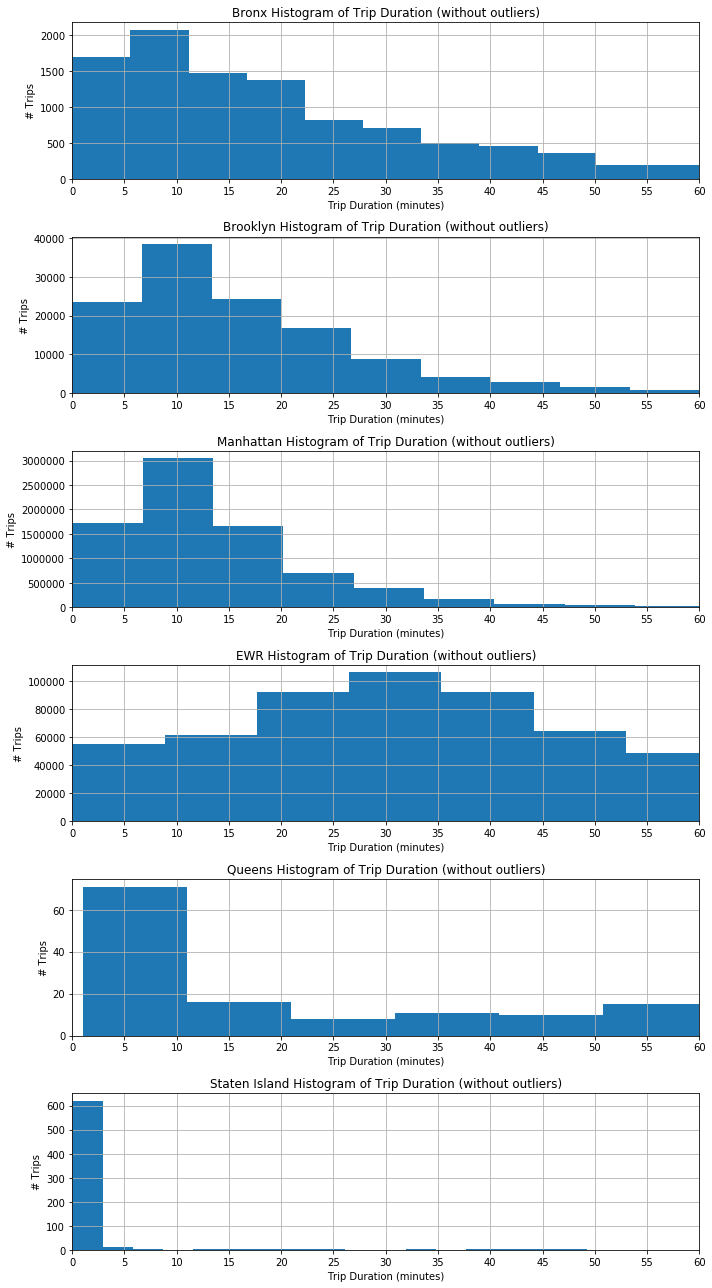

In [97]:
#boroughs=[,'Brooklyn','EWR','Manhattan','Queens','Staten Island','Unknown']
bronx_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough']) == 'Bronx']
brooklyn_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'Brooklyn')]
ewr_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'EWR')]
manhattan_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'Manhattan')]
queens_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'Queens')]
si_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'Staten Island')]
#unknown_rides  = yellow_2018_06_with_tz.loc[(yellow_2018_06_with_tz['Borough'] == 'Unknown')]

# create a vector to contain Trip Duration
v_bronx = bronx_rides.trip_duration
v_brooklyn = brooklyn_rides.trip_duration
v_ewr = ewr_rides.trip_duration
v_manhattan = manhattan_rides.trip_duration
v_queens = queens_rides.trip_duration
v_si = si_rides.trip_duration

c=0
x=[]
while c<=60:
    x.append(c)
    c+=5
fig,ax = plt.subplots(6,1,figsize = (10,18)) 

# exclude any data point located further than 3 standard deviations of the median point and 
# plot the histogram with 30 bins

v_bronx[~((v_bronx-v_bronx.median()).abs()>3*v_bronx.std())].hist (bins=30,ax=ax[0]) 
v_brooklyn[~((v_brooklyn-v_brooklyn.median()).abs()>3*v_brooklyn.std())].hist (bins=30,ax=ax[1]) 
v_ewr[~((v_ewr-v_ewr.median()).abs()>3*v_ewr.std())].hist (bins=30,ax=ax[5])
v_manhattan[~((v_manhattan-v_manhattan.median()).abs()>3*v_manhattan.std())].hist (bins=30,ax=ax[2])
v_queens[~((v_queens-v_queens.median()).abs()>3*v_queens.std())].hist (bins=30,ax=ax[3])
v_si[~((v_si-v_si.median()).abs()>3*v_si.std())].hist (bins=30,ax=ax[4])

ax[0].set_xticks(x) 
ax[0].set_xlabel('Trip Duration (minutes)')
ax[0].set_ylabel('# Trips')
ax[0].set_title('Bronx Histogram of Trip Duration (without outliers)')
ax[0].set_xlim([0,60])
fig.tight_layout() 
    
ax[1].set_xticks(x) 
ax[1].set_xlabel('Trip Duration (minutes)')
ax[1].set_ylabel('# Trips')
ax[1].set_title('Brooklyn Histogram of Trip Duration (without outliers)')
ax[1].set_xlim([0,60])
fig.tight_layout() 

ax[2].set_xticks(x) 
ax[2].set_xlabel('Trip Duration (minutes)')
ax[2].set_ylabel('# Trips')
ax[2].set_title('Manhattan Histogram of Trip Duration (without outliers)')
ax[2].set_xlim([0,60])
fig.tight_layout() 

ax[3].set_xticks(x) 
ax[3].set_xlabel('Trip Duration (minutes)')
ax[3].set_ylabel('# Trips')
ax[3].set_title('EWR Histogram of Trip Duration (without outliers)')
ax[3].set_xlim([0,60])
fig.tight_layout()

ax[4].set_xticks(x) 
ax[4].set_xlabel('Trip Duration (minutes)')
ax[4].set_ylabel('# Trips')
ax[4].set_title('Queens Histogram of Trip Duration (without outliers)')
ax[4].set_xlim([0,60])
fig.tight_layout() 

ax[5].set_xticks(x) 
ax[5].set_xlabel('Trip Duration (minutes)')
ax[5].set_ylabel('# Trips')
ax[5].set_title('Staten Island Histogram of Trip Duration (without outliers)')
ax[5].set_xlim([0,60])
fig.tight_layout() 

plt.show()